# Big Mart Sales Prediction

In [1]:
import pandas as pd

dados_treino = pd.read_csv('train_v9rqX0R.csv')
dados_teste = pd.read_csv('test_AbJTz2l.csv')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
display(dados_treino.head())
display(dados_teste.head())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


### Visualização da distribuição da coluna Item_Outlet_Sales

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribuição de Vendas | Dados de treino')

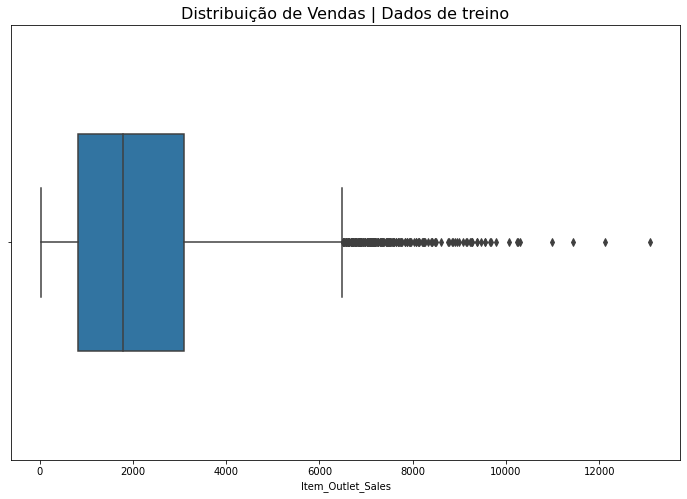

In [5]:
ax = sns.boxplot(dados_treino['Item_Outlet_Sales'], width = 0.5)
ax.figure.set_size_inches(12, 8)
ax.set_title('Distribuição de Vendas | Dados de treino', fontsize = 16)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Frequência de Vendas | Dados de treino')

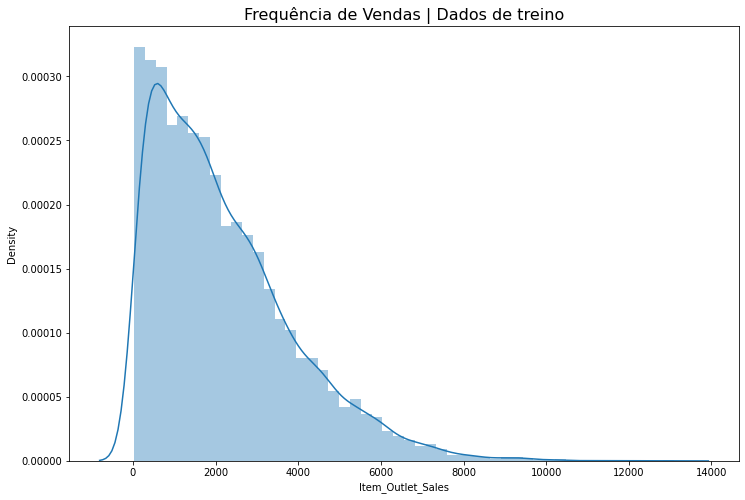

In [6]:
ax = sns.distplot(dados_treino['Item_Outlet_Sales'])
ax.figure.set_size_inches(12, 8)
ax.set_title('Frequência de Vendas | Dados de treino', fontsize = 16)

### Tratamento de dados

In [7]:
dados_treino.shape

(8523, 12)

In [8]:
dados_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
dados_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [10]:
# Retirando as colunas de ID do DataFrame

dados_treino.drop(['Item_Identifier', 'Outlet_Identifier'], axis = 1, inplace = True)

In [11]:
# Substituindo os valores faltantes nos pesos pela média de todos os pesos

dados_treino['Item_Weight'].fillna(dados_treino['Item_Weight'].mean(), axis = 0, inplace = True)

dados_teste['Item_Weight'].fillna(dados_teste['Item_Weight'].mean(), axis = 0, inplace = True)

In [12]:
# Substituindo os valores faltantes no Dataset de treino da coluna Outlet Size por suas respectivas Modas

moda_outletsize = dados_treino.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x: x.mode()))
moda_outletsize

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [13]:
missing_outletsize = dados_treino['Outlet_Size'].isnull()

In [14]:
dados_treino.loc[missing_outletsize, 'Outlet_Size'] = dados_treino.loc[missing_outletsize, 'Outlet_Type'].apply(lambda x: moda_outletsize[x])

In [15]:
# Substituindo os valores faltantes no Dataset de treino da coluna Outlet Size por suas respectivas Modas

moda_outletsize2 = dados_teste.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x: x.mode()))
moda_outletsize2

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [16]:
missing_outletsize2 = dados_teste['Outlet_Size'].isnull()

In [17]:
dados_teste.loc[missing_outletsize2, 'Outlet_Size'] = dados_teste.loc[missing_outletsize2, 'Outlet_Type'].apply(lambda x: moda_outletsize2[x])

In [18]:
# DataFrame sem nenhum dado faltante

dados_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [19]:
dados_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [20]:
# Valores unicos na coluna Item Fat

dados_treino['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [21]:
# Valores unicos na coluna Outlet Size

dados_treino['Outlet_Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [22]:
# Valores unicos na coluna Outlet Location

dados_treino['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [23]:
# Valores unicos na coluna Outlet Type

dados_treino['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [24]:
dados_treino['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [25]:
# Corrigindo a coluna Item Fat

trocar_itemfat = {
    'Low Fat': 'Low Fat',
    'Regular': 'Regular',
    'reg': 'Regular',
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
}

dados_treino['Item_Fat_Content'] = dados_treino['Item_Fat_Content'].map(trocar_itemfat)


In [26]:
# Encoding labels

from sklearn.preprocessing import LabelEncoder

In [27]:
encoder = LabelEncoder()

In [28]:
dados_treino['Item_Fat_Content'] = encoder.fit_transform(dados_treino['Item_Fat_Content'])

dados_treino['Item_Type'] = encoder.fit_transform(dados_treino['Item_Type'])

dados_treino['Outlet_Size'] = encoder.fit_transform(dados_treino['Outlet_Size'])

dados_treino['Outlet_Location_Type'] = encoder.fit_transform(dados_treino['Outlet_Location_Type'])

dados_treino['Outlet_Type'] = encoder.fit_transform(dados_treino['Outlet_Type'])

#-=-=-=--=-=-=--=-=-=--=-=-=--=-=-=--=-=-=--=-=-=--=-=-=--=-=-=--=-=-=--=-=-=--=-=-=--=-=-=--=-=-=--=-=-=-#

dados_teste['Item_Fat_Content'] = encoder.fit_transform(dados_teste['Item_Fat_Content'])

dados_teste['Item_Type'] = encoder.fit_transform(dados_teste['Item_Type'])

dados_teste['Outlet_Size'] = encoder.fit_transform(dados_teste['Outlet_Size'])

dados_teste['Outlet_Location_Type'] = encoder.fit_transform(dados_teste['Outlet_Location_Type'])

dados_teste['Outlet_Type'] = encoder.fit_transform(dados_teste['Outlet_Type'])

In [29]:
dados_treino

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,1,0.000000,6,182.0950,1998,2,2,0,732.3800
4,8.930,0,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,1,0.046982,0,108.1570,2002,2,1,1,549.2850
8520,10.600,0,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,1,0.145221,13,103.1332,2009,1,2,2,1845.5976


### Vamos analisar o pairplot para verificar a relação das variáveis preditoras com a variável alvo

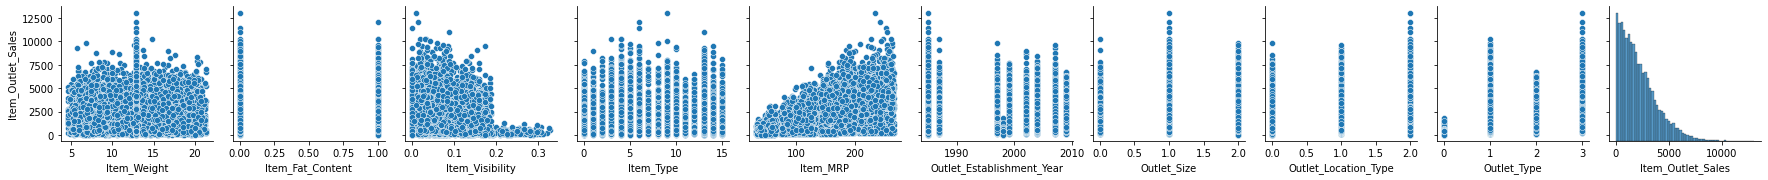

In [30]:
sns.pairplot(y_vars = ['Item_Outlet_Sales'], data = dados_treino)

### Correlações

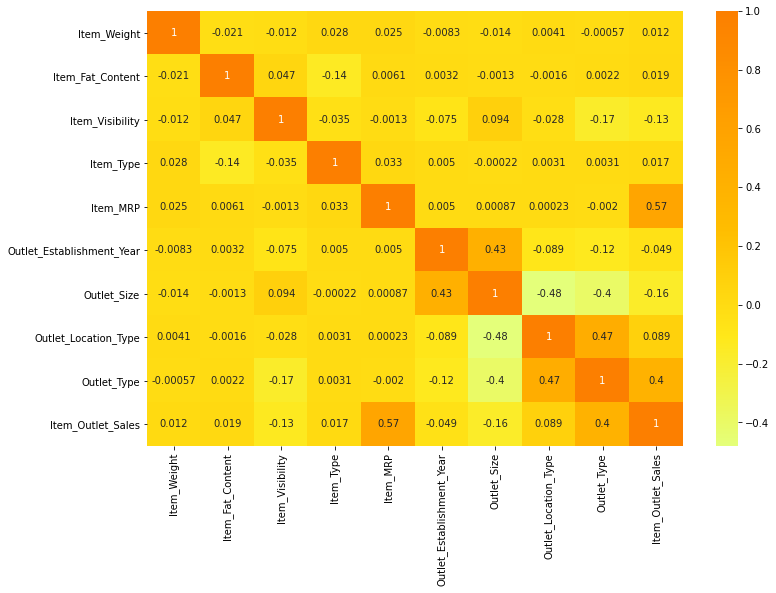

In [31]:
ax = sns.heatmap(dados_treino.corr(), annot=True, cmap="Wistia")
ax.figure.set_size_inches(12, 8)

## Aplicando o modelo de Machine Learning - Random Forest Regressor

In [32]:
# Separação das variáveis

X = dados_treino.drop(['Item_Outlet_Sales'], axis = 1)
y = dados_treino['Item_Outlet_Sales']

In [33]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y , test_size = 0.2)

In [34]:
# Instanciando e fitando o modelo

from sklearn.ensemble import RandomForestRegressor

modelo = RandomForestRegressor()

modelo.fit(X_treino, y_treino)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [35]:
previsoes = modelo.predict(X_teste)

In [36]:
# Score

modelo.score(X_treino, y_treino)

0.9380957009768169

In [37]:
# R^2

from sklearn.metrics import r2_score

r2_score(y_teste, previsoes)

0.5709049286020755

#### Fazendo as previsoes no dataset de teste...

In [38]:
# Salvando as IDs

ids_items = dados_teste['Item_Identifier']
outlet_ids = dados_teste['Outlet_Identifier']

In [39]:
dados_teste.drop(['Item_Identifier', 'Outlet_Identifier'], axis = 1, inplace = True)

In [40]:
previsoes_do_teste = pd.Series(modelo.predict(dados_teste))

In [41]:
final_dados = pd.concat([ids_items, outlet_ids, previsoes_do_teste], axis = 1)

In [42]:
final_dados.rename(columns = {0: 'Item_Outlet_Sales'}, inplace = True)

## Tabela final com as previsões do Dataset de Teste (Solução)

In [43]:
final_dados

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1659.646318
1,FDW14,OUT017,1309.482124
2,NCN55,OUT010,691.060452
3,FDQ58,OUT017,2590.428060
4,FDY38,OUT027,5147.972258
...,...,...,...
5676,FDB58,OUT046,2208.731578
5677,FDD47,OUT018,2599.090118
5678,NCO17,OUT045,1724.635056
5679,FDJ26,OUT017,5129.309884


In [44]:
# Exportando arquivo CSV

#final_dados.to_csv('solucao_randomforestregressor.csv', encoding = 'utf-8', index = False)